# Documentation Outline for the "Lexicon Borussiae loquentem" aka "LexBoLo"

During **pre-project phase** we implement the software stack needed to verify the ideas on a local developers machine. 
For the final application will be server- or cloud based we will use the regular components in Open Source AI development needed to deploy later to any production enviroment.

## Overview/Agenda
- ### Prerequisites
- ### Configuring the project
- ### Setting up Llama 2 Model
- ### Setting up UI
- ### Running the Demonstrator
- ### Prepare & Transform Data
- ### Ingest/Train Data
- ### Before/After Prompts Demos



## Prerequisites

We start with am empty PC Workstation.

### Hardware

* Intel Core i7-13700 KF
* 32 GB RAM
* 2 TB SDD
* NVIDIA RTX 4070 Ti, 12 GB
* 500 MBit LAN

### Software
* OS: Windows 11 (Dev) - Linux/Container on Server

#### Install Python
Programming Language: Python [https://www.python.org/downloads/](https://www.python.org/downloads/) latest (v3.11.5)



Installing Python to `/main/python`, updating `PATH` variables.
Testing result with:

Installing JetBrain PyCharm 2023.2.1 as Developer IDE from [Jetbrains](https://www.jetbrains.com/). Basically any Python IDE will do - and no IDE will be needed to run the final system in production.

Create empty Python Project in PyCharm; configure interpreter to use /main/python (or stay with PyCharms `venv`)





![PyCharmProjectConfiguration](images/Screenshot%202023-09-09%20160713.png)




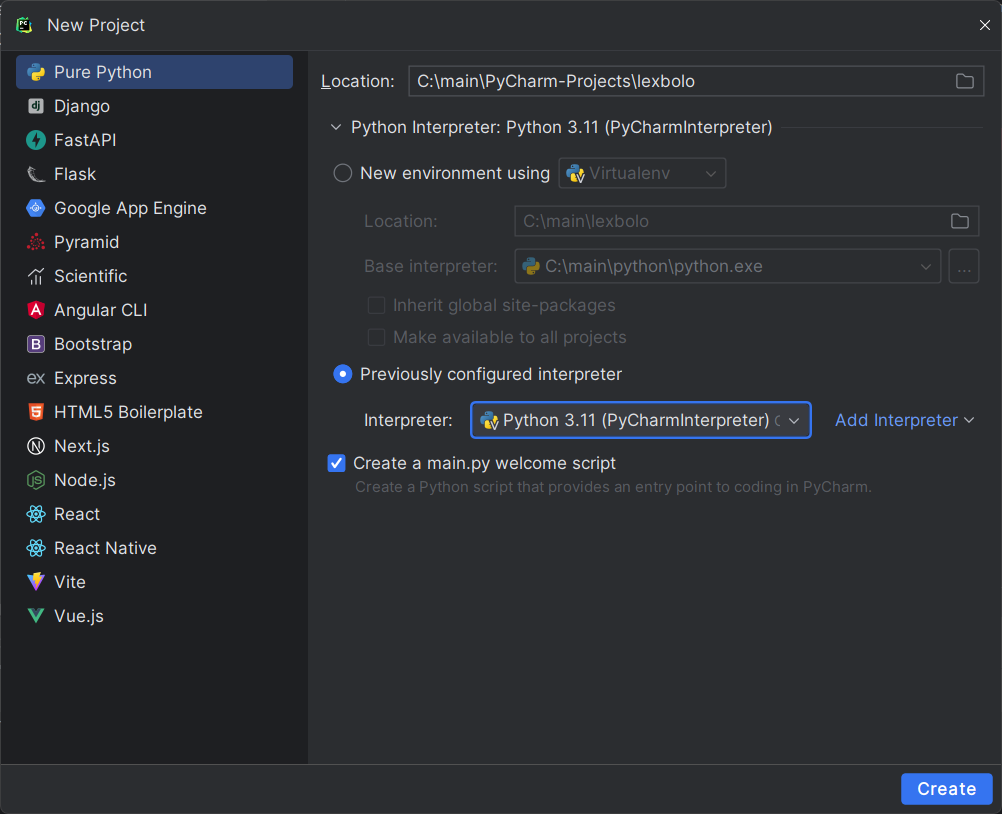

#### Install Git

Download & Install [Git for Windows](https://gitforwindows.org/) to `~/main/Git` .
Configure PyCharm->Settings->Version Control->GitHub to use your own credentials.

This project on GitHub: [Lexolo at https://github.com/temporis67/lexbolo](https://github.com/temporis67/lexbolo)



#### Install Jupyter 
In PyCharm by just opening a Jupyter Notebook triggers the plugin installer.

Adding this Jupyter Notebook to the Git project.
Adding README.md for Github.com to the Git project.

#### Initial Git Commit
`git commit ...`



### Setting up Llama 2 Model
Download a model from [Huggingface.co](Huggingface.co) - Use an GGUF for GGML is no longer supported by the llama-cpp module
- Meta Original:  [https://huggingface.co/meta-llama/Llama-2-7b](https://huggingface.co/meta-llama/Llama-2-7b)  - This needs you to register and apply at Meta Inc. 
- TheBloke/SpicyBoros: [https://huggingface.co/TheBloke/Spicyboros-13B-2.2-GGUF](https://huggingface.co/TheBloke/Spicyboros-13B-2.2-GGUF) - This is free and uncensored - which also means out of the box, that there is no filter for harmful/inappropriate content, so be warned and be careful.

Copy the model's files to your project diretory under `./models/`
![ModelFolder](images/Screenshot%202023-09-10%20155138.png)

We want to install the python package `llama-cpp-python` to enable Llama support in python. 
But it needs a CPP compiler, any C Build Enviroment should do.
For now I install MS Visual Studio: [https://visualstudio.microsoft.com/de/vs/](https://visualstudio.microsoft.com/de/vs/).
Make sure to install the C++ Development Modules when installing MS Visual Studio.

##### Install Llama Support for Python

pip install llama-cpp-python (code like this could be actually executed from here in the Jupyter Notebook!)

Well done! Now we already can run our first question to get an answer from the model:
Create a Script 'run-llama.py' in your PyTorch project, copy the following code:

In [4]:
# load the large language model file
from llama_cpp import Llama
LLM = Llama(model_path="../models/gguf/spicyboros-13b-2.2.Q4_K_M.gguf")

# create a text prompt
prompt = "Q: What are the names of the days of the week in german? A:"

# generate a response (takes several seconds)
output = LLM(prompt)

# display the response
print(output["choices"][0]["text"])

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 0 | VSX = 0 | 


 Monday is Montag, Tuesday is Dienstag, Wednesday is Mittwoch, Thursday is Donnerstag, Friday is Freitag, Saturday is Samstag and Sunday is Sonntag.


If everything works well you can execute the script right above here and should get a response like:
`Monday is Montag, Tuesday is Dienstag, Wednesday is Mittwoch, Thursday is Donnerstag, Friday is Freitag, Saturday is Samstag and Sunday is Sonntag.`
after some seconds.

#### Install langchain
via 'pip install langchain'

#### Install sentence-transformers
via `pip install sentence-transformers`

#### Install NVidia CUDA - 
- NVidia GPU Computing Support for Machine Learning - if you have a Nvida Graphic Card
[Installation Instructions](https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html)
[https://developer.nvidia.com/cuda-downloads](https://developer.nvidia.com/cuda-downloads)
- Reinstall `llama-cpp-python` and `pytorch` to enable it for CUDA & BLAS (i.e. GPU Support Libraries)
- - Again you need a C Compiler like Visual Studio. [Installation with OpenBLAS / cuBLAS / CLBlast](https://python.langchain.com/docs/integrations/llms/llamacpp#installation-with-openblas--cublas--clblast)
- - [3. Install pytorch with cuda](https://telin.ugent.be/telin-docs/windows/pytorch/)

When ok, you should see some output on the console/log:
![Gpu Device found](images/GPU-Konsolenoutput.png)


## Demonstrator

### Fragen:

- Wann wurde Friedrich Wilhelm der III. geboren?
- Wer war der Stallmeister von Friedrich Wilhelm der III.?
- Wer war 1813 Portepeefähnrich?